In [7]:
# len(temp)

Text(0.5, 0.98, 'Transición de fase')

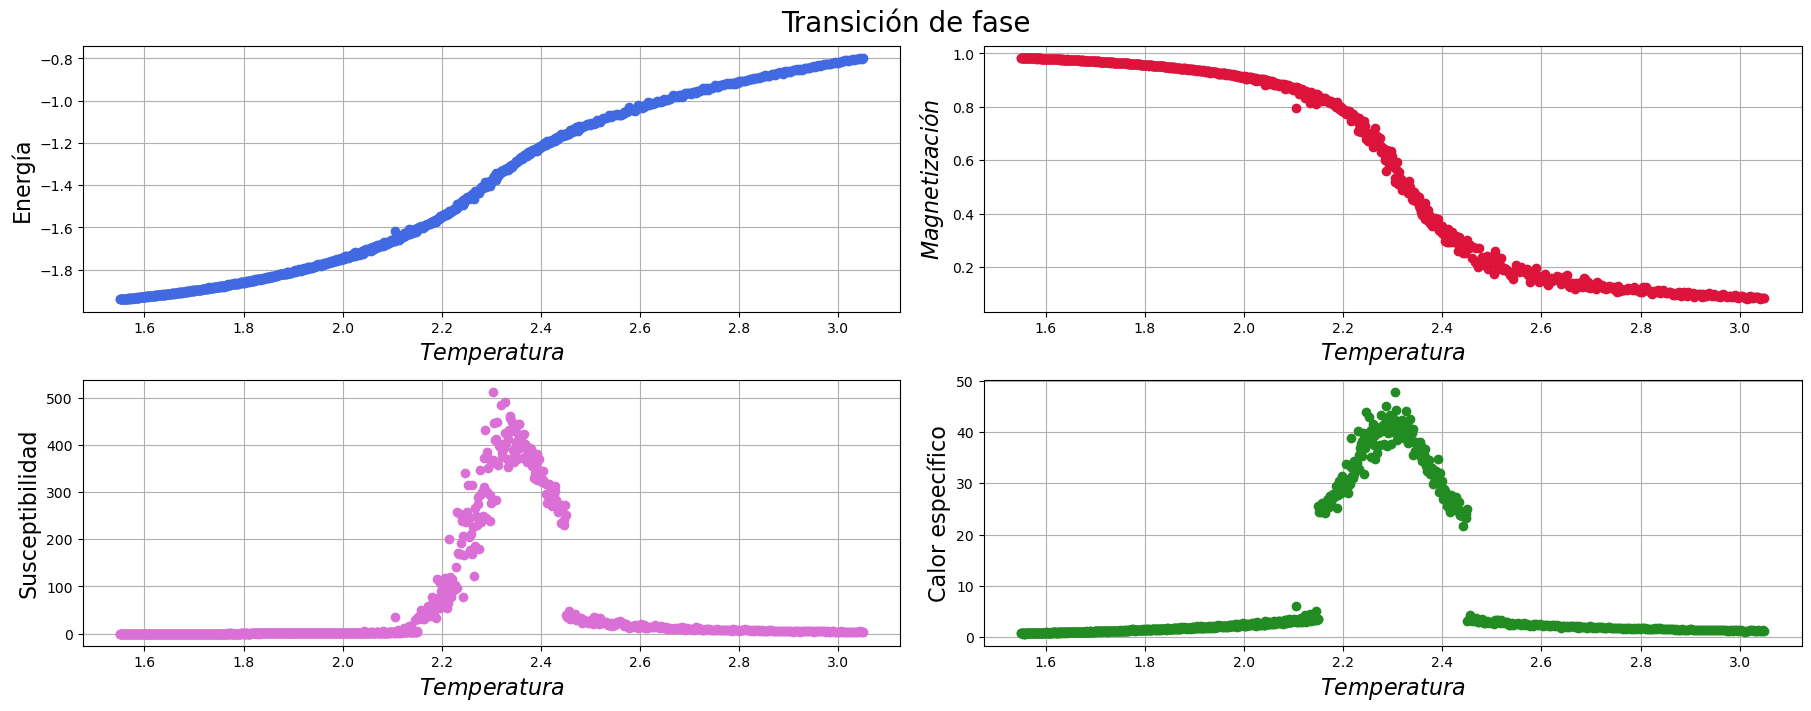

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
results = np.loadtxt("results_vs_T.dat")
temp = results[:,0]
emedia = results[:,2]
mmedia = results[:,1]
chi = results[:,3]
c = results[:,4]

fig = plt.figure(constrained_layout=True,figsize=(18,7))
gs=fig.add_gridspec(2,2)

ax2=fig.add_subplot(gs[0,0])
ax2.set_xlabel(r'$Temperatura$',fontsize=16)
ax2.set_ylabel(r'Energía',fontsize=16)
ax2.grid()
ax2.plot(temp,emedia,color='royalblue',marker='o',linestyle='')

ax1=fig.add_subplot(gs[0,1])
ax1.set_xlabel(r'$Temperatura$',fontsize=16)
ax1.set_ylabel(r'$Magnetización$',fontsize=16)
ax1.grid()
ax1.plot(temp,np.abs(mmedia),color='crimson',marker='o',linestyle='')

ax2=fig.add_subplot(gs[1,0])
ax2.set_xlabel(r'$Temperatura$',fontsize=16)
ax2.set_ylabel(r'Susceptibilidad',fontsize=16)
ax2.grid()
ax2.plot(temp,np.abs(chi),color='orchid',marker='o',linestyle='')

ax2=fig.add_subplot(gs[1,1])
ax2.set_xlabel(r'$Temperatura$',fontsize=16)
ax2.set_ylabel(r'Calor específico',fontsize=16)
ax2.grid()
ax2.plot(temp,c,color='forestgreen',marker='o',linestyle='')

plt.suptitle('Transición de fase',fontsize=20)

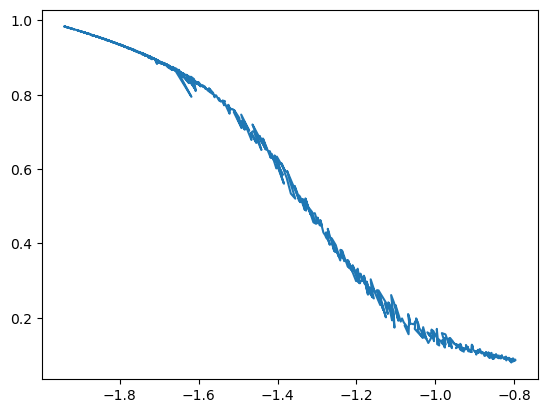

In [8]:
plt.plot(emedia,np.abs(mmedia))

/tmp/ipykernel_44843/3732759028.py:10: RuntimeWarning: divide by zero encountered in divide
  chi1 = 1/(2*(T_c - T1))
/tmp/ipykernel_44843/3732759028.py:11: RuntimeWarning: divide by zero encountered in divide
  chi2 = 1/(T2-T_c)
/tmp/ipykernel_44843/3732759028.py:35: RuntimeWarning: divide by zero encountered in divide
  l2=1/(1-L2)


Text(0.5, 0.98, 'Campo medio')

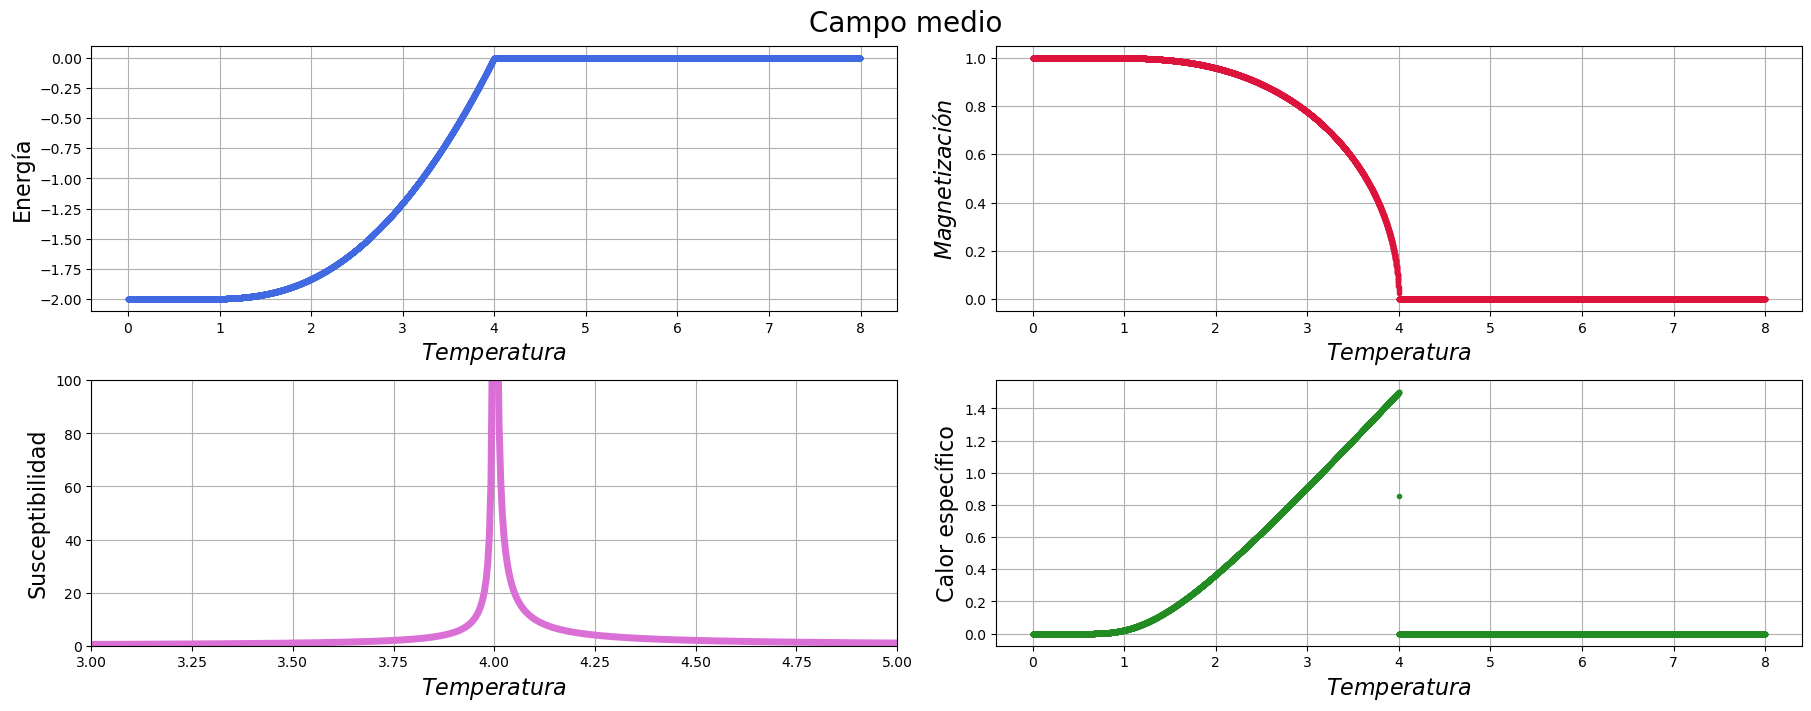

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
#--------------------------------------------------------------------
#Graficamos la suceptibilidad
T_c = 4    #para una red de Ising 2D Tc=4*J/Kb
cero=10**(-8)
T1=np.linspace(cero,T_c,1000)
T2=np.linspace(T_c,8,1000)
chi1 = 1/(2*(T_c - T1))
chi2 = 1/(T2-T_c)

#--------------------------------------------------------------------
#resuelve la ecuacion de autoconsistencia usando el metodo de Newton
# Definimos la función a la que le queremos buscar los ceros
def f(x):
    return x - np.tanh(beta*q*J*x)

    # Definimos parámetros para el sistema
q   = 4   # Número de primeros vecinos
J   = 1   # Energía de interacción entre primeros vecinos
kTc = q*J # Temperatura crítica
# Calculamos los ceros de la función entre kT=0 y kT=2*kTc. Generamos un vector con temperaturas en este rango.
kT = np.arange(.0001*2*kTc, 2*kTc, .0001*2*kTc)
L0 = np.zeros(np.size(kT))

# Usamos el método de la secante para encontrar los ceros para cada temperatura
x = 1.1 # Guess inicial
for i in range(np.size(kT)):
    beta = 1./kT[i]
    L0[i] = newton(f, x, tol=1e-08, maxiter=100)
#--------------------------------------------------------------------
#Calor especifico
L2=L0**2
l2=1/(1-L2)
tt=kT/kTc
tt2=tt**2
c=L2/((tt2)*(l2)-tt)
#--------------------------------------------------------------------
fig = plt.figure(constrained_layout=True,figsize=(18,7))
gs=fig.add_gridspec(2,2)

ax2=fig.add_subplot(gs[0,0])
ax2.set_xlabel(r'$Temperatura$',fontsize=16)
ax2.set_ylabel(r'Energía',fontsize=16)
ax2.grid()
# plt.axvspan(0,4,color='blue', alpha = 0.20)
ax2.plot(kT,-2*np.abs(L0)**2,color='royalblue',marker='.',linestyle='')

ax1=fig.add_subplot(gs[0,1])
ax1.set_xlabel(r'$Temperatura$',fontsize=16)
ax1.set_ylabel(r'$Magnetización$',fontsize=16)
ax1.grid()
# plt.axvspan(0,4,color='blue', alpha = 0.20)
ax1.plot(kT,L0,color='crimson',marker='.',linestyle='')

ax2=fig.add_subplot(gs[1,0])
plt.xlim(3,5)
plt.ylim(0,100)
ax2.set_xlabel(r'$Temperatura$',fontsize=16)
ax2.set_ylabel(r'Susceptibilidad',fontsize=16)
ax2.grid()
# plt.axvspan(0,4,color='blue', alpha = 0.20)
ax2.plot(T2,chi2,color='orchid',marker='',linestyle='-',lw='5')
ax2.plot(T1,chi1,color='orchid',marker='',linestyle='-',lw='5')

ax2=fig.add_subplot(gs[1,1])

ax2.set_xlabel(r'$Temperatura$',fontsize=16)
ax2.set_ylabel(r'Calor específico',fontsize=16)
ax2.grid()
# plt.axvspan(0,4,color='blue', alpha = 0.20)
ax2.plot(kT,c,color='forestgreen',marker='.',linestyle='')

plt.suptitle('Campo medio',fontsize=20)